# **Najlepsze 5000 albumów muzycznych - statystyka i analiza danych** 
#### Zuzanna Nasiłowska, Rafał Głodek
***

### **Spis treści** 

**Wprowadzenie**
***

**Analiza danych - średnie i rozkłady**
***

#### **Analiza danych - średnie i rozkłady**

In [2]:
from pandas import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

Z pobranego pliku csv pobieramy oceny użytkowników oraz daty wydania albumów.

In [27]:
ratings = read_csv("rym_top_5000_all_time.csv")['Average Rating'].tolist()
dates = read_csv("rym_top_5000_all_time.csv")['Release Date'].tolist()
genres = read_csv("rym_top_5000_all_time.csv")['Genres'].tolist()
genres1 = ["Rock", "Hip Hop", "Pop", "Jazz", "Soul", "Dance", "Techno", "Punk", "Metal","Folk"]
artists = read_csv("rym_top_5000_all_time.csv")['Artist Name'].tolist()
years = []
for date in dates:
    years.append(int(date[-4:]))

Y = ratings
X = np.array(years).reshape(-1, 1)

from collections import Counter
artists.sort(key=Counter(artists).get, reverse=True)    

bb=dict(zip(list(artists),[list(artists).count(i) for i in list(artists)])) 
print(bb)

art_top = ["Miles Davis ", "John Coltrane ", "Tom Waits ", "John Williams " , "Bob Dylan ", "The Beatles ", "Pharoah Sanders ", "Ennio Morricone ", "Herbie Hancock ", "Pink Floyd "]
art_i = [17, 14, 13, 12, 11, 10, 9,9,9,8]
art_top_hist = [art_top[i] * art_i[i] for i in range(len(art_top))]
print(art_top_hist)


{'Various Artists': 25, 'Miles Davis': 17, 'John Coltrane': 14, 'Tom Waits': 13, 'John Williams': 12, 'Bob Dylan': 11, 'The Beatles': 10, 'Pharoah Sanders': 9, 'Ennio Morricone': 9, 'Herbie Hancock': 9, 'The Fall': 9, 'Pink Floyd': 8, 'David Bowie': 8, 'Black Sabbath': 8, 'Swans': 8, 'Iron Maiden': 8, 'Opeth': 8, 'Jorge Ben': 8, 'Sonny Rollins': 8, '久石譲 [Joe Hisaishi]': 8, 'McCoy Tyner': 8, 'Thelonious Monk': 8, 'Muddy Waters': 8, 'Radiohead': 7, 'King Crimson': 7, 'Kanye West': 7, 'Sonic Youth': 7, 'Charles Mingus': 7, 'The Kinks': 7, 'Judas Priest': 7, 'Van Morrison': 7, 'Jethro Tull': 7, 'Bruce Springsteen': 7, 'Rush': 7, 'Steely Dan': 7, 'Coil': 7, 'Stereolab': 7, 'Art Blakey & The Jazz Messengers': 7, 'John Fahey': 7, 'PJ Harvey': 7, 'Nick Cave & The Bad Seeds': 7, 'Johnny Cash': 7, 'Porcupine Tree': 7, 'The Mountain Goats': 7, 'Joe Henderson': 7, 'Gentle Giant': 7, 'Frank Sinatra': 7, 'The Cure': 6, 'Led Zeppelin': 6, 'Kate Bush': 6, 'Leonard Cohen': 6, 'Death Grips': 6, 'Elliott

In [34]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

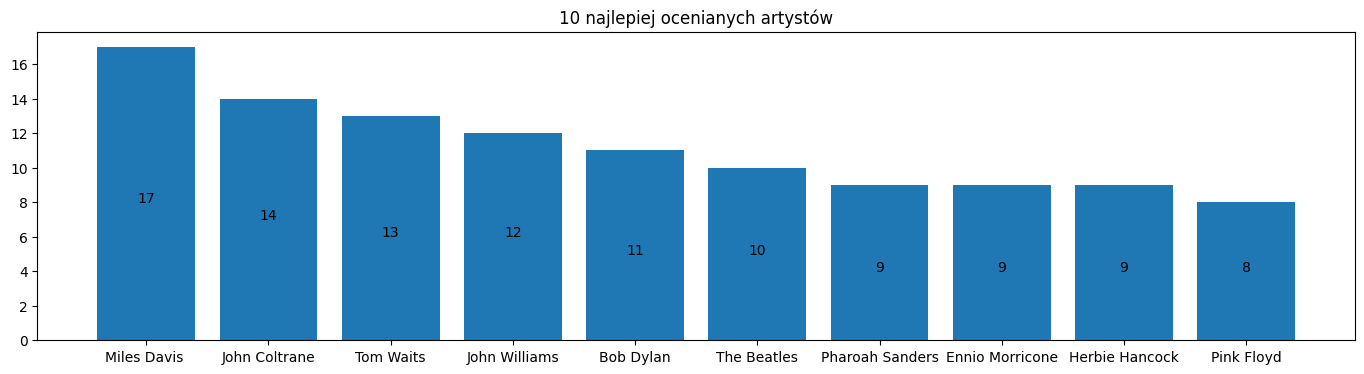

In [44]:
plt.figure(figsize=(17,4))
addlabels(art_top, art_i)
plt.bar(art_top, art_i)
plt.tight_layout
plt.title("10 najlepiej ocenianych artystów")
plt.show()

In [45]:
genres2 = []
ratings2 = []
years2 = []
for i in range(len(genres)):
    no = 0
    for genre1 in genres1:
        if genre1 in genres[i]:
            genres2.append(genre1)
            ratings2.append(ratings[i])    
            years2.append(years[i])
print(min(years), max(years))


1947 2021


In [47]:
rock_r = []
punk_r = []
punk_y = []
techno_r = []
techno_y = []
dance_r = []
dance_y = []
soul_r = []
soul_y = []
jazz_r = []
jazz_y = []
pop_r = []
pop_y = []
metal_r = []
metal_y = []
rock_y = []
hiphop_r = []
hiphop_y = []
folk_r = []
folk_y = []
for i in range(len(genres2)):
    if genres2[i] == "Rock":
        rock_r.append(ratings2[i])
        rock_y.append(years2[i])
    elif genres2[i] == "Hip Hop":
        hiphop_r.append(ratings2[i])
        hiphop_y.append(years2[i])
    elif genres2[i] == "Pop":
        pop_r.append(ratings2[i])
        pop_y.append(years2[i])
    elif genres2[i] == "Jazz":
        jazz_r.append(ratings2[i])
        jazz_y.append(years2[i])
    elif genres2[i] == "Soul":
        soul_r.append(ratings2[i])
        soul_y.append(years2[i])
    elif genres2[i] == "Dance":
        dance_r.append(ratings2[i])
        dance_y.append(years2[i])
    elif genres2[i] == "Techno":
        techno_r.append(ratings2[i])
        techno_y.append(years2[i])
    elif genres2[i] == "Punk":
        punk_r.append(ratings2[i])
        punk_y.append(years2[i])
    elif genres2[i] == "Metal":
        metal_r.append(ratings2[i])
        metal_y.append(years2[i])
    elif genres2[i] == "Folk":
        folk_r.append(ratings2[i])
        folk_y.append(years2[i])
print(len(rock_r), len(hiphop_r))
print(np.mean(rock_r), np.mean(hiphop_r), np.mean(pop_r), np.mean(jazz_r), np.mean(soul_r), np.mean(dance_r), np.mean(techno_r), np.mean(punk_r), np.mean(metal_r), np.mean(folk_r))
def rate_range(l):
    return max(l) - min(l)
print(rate_range(rock_r), rate_range(hiphop_r), rate_range(pop_r), rate_range(jazz_r), rate_range(soul_r), rate_range(dance_r), rate_range(techno_r), rate_range(punk_r), rate_range(metal_r), rate_range(folk_r))

1636 296
3.7661246943765283 3.7855067567567575 3.7634683098591553 3.7835033259423505 3.7893251533742323 3.7751851851851854 3.737368421052633 3.7603383458646618 3.743721854304636 3.774696569920845
0.7799999999999998 0.7499999999999996 0.71 0.6999999999999997 0.5499999999999998 0.4399999999999995 0.3600000000000003 0.6800000000000002 0.6100000000000003 0.5799999999999996


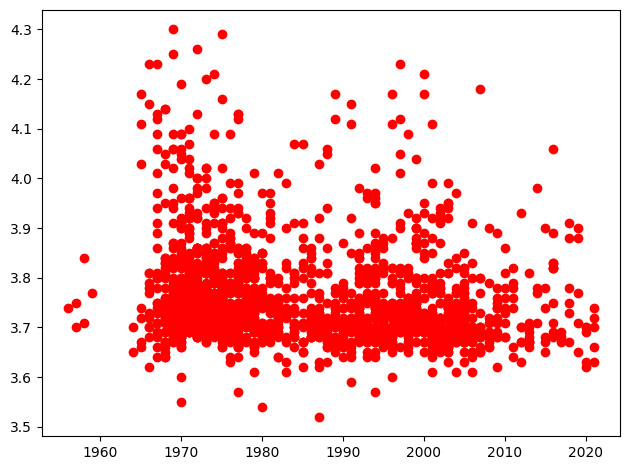

In [8]:
plt.scatter(rock_y, rock_r, c="r", marker="o")
#plt.scatter(hiphop_y, hiphop_r, c="b", marker="o")
#plt.scatter(pop_y, pop_r, c="g", marker="o")
#plt.scatter(jazz_y, jazz_r, c="pink", marker="o")
plt.show()

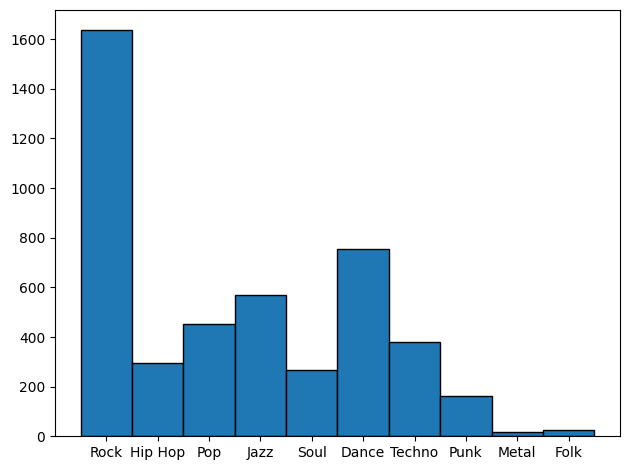

In [9]:

plt.rcParams["figure.autolayout"] = True
x = np.random.randn(1000)
n_bins = 10
n, bins, patches = plt.hist(genres2, bins = n_bins, edgecolor="black")
ticks = [(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]
ticklabels = genres1
plt.xticks(ticks, ticklabels)
plt.show()

In [ ]:
plt.rcParams["figure.autolayout"] = True
x = np.random.randn(1000)
n_bins = 10
n, bins, patches = plt.hist(genres2, bins = n_bins, edgecolor="black")
ticks = [(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]
# Ustawienie etykiet na przedziały
ticklabels = genres1
plt.xticks(ticks, ticklabels)
plt.show()

W celu przeprowadzenia analizy danych, dla ocen oraz lat obliczymy pięć rodzajów średnich: arytemtyczną, harmoniczną, geometryczną, ucinaną oraz winsorowską.

* Średnia arytmetyczna

In [18]:
a_mean_ratings = np.mean(ratings)
a_mean_years = np.mean(years)
print(f"Średnia arytmetyczna\n ocen: {a_mean_ratings} \n lat: {a_mean_years}")

Średnia arytmetyczna
 ocen: 3.771304 
 lat: 1987.4574


* Średnia harmoniczna

In [19]:
def harmonic_mean(data):
    sum1 = 0
    for i in data:
        sum1 += 1/i
    return len(data)/sum1

In [20]:
h_mean_ratings = harmonic_mean(ratings)
h_mean_years = harmonic_mean(years)
print(f"Średnia harmoniczna\n ocen: {h_mean_ratings} \n lat: {h_mean_years}")

Średnia harmoniczna
 ocen: 3.7687982115189165 
 lat: 1987.3300564474273


* Średnia geometryczna

In [21]:
def geometric_mean(data):
    prod = 1
    for i in data:
        prod *= i**(1/len(data))
    return prod

In [22]:
g_mean_ratings = geometric_mean(ratings)
g_mean_years = geometric_mean(years)
print(f"Średnia geometryczna\n ocen: {g_mean_ratings} \n lat: {g_mean_years}")

Średnia geometryczna
 ocen: 3.77003571281623 
 lat: 1987.393716287949


* Średnia ucinana

In [23]:
def truncated_mean(data, k):
    n = len(data)
    data.sort()
    sum1 = 0
    for i in range(k+1, n-k+1):
        sum1 += data[i]
    return sum1 / (n-2*k)


In [24]:
t_mean_ratings = truncated_mean(ratings,500)
t_mean_years = truncated_mean(years,500)
print(f"Średnia ucinana\n ocen: {t_mean_ratings} \n lat: {t_mean_years}")

Średnia ucinana
 ocen: 3.7585075000000105 
 lat: 1987.19825


* Średnia winsorowska

In [25]:
def winsorized_mean(data, k):
    n = len(data)
    data.sort()
    sum1 = 0
    for i in range(k+2, n-k):
        sum1 += data[i]
    return 1/n * ((k+1)*data[k] + sum1 + (k+1)*data[n-k-1])

In [26]:
w_mean_ratings = winsorized_mean(ratings, 500)
w_mean_years = winsorized_mean(years, 500)
print(f"Średnia winsorowska\n ocen: {w_mean_ratings} \n lat: {w_mean_years}")

Średnia winsorowska
 ocen: 3.7648060000000094 
 lat: 1987.3586


**Wykres pudełkowy wraz z wyliczonymi średnimi**

* Oceny użytkowników

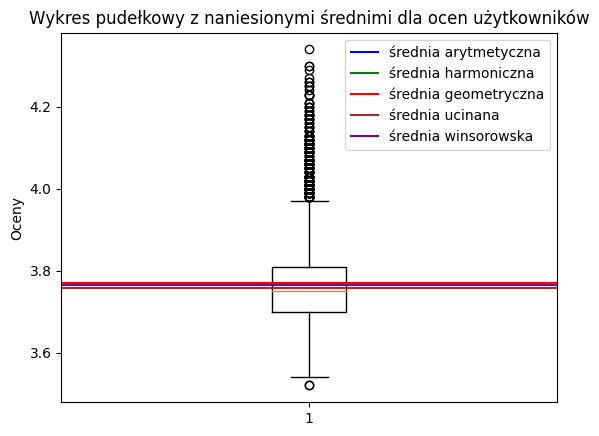

In [27]:
xs = np.linspace(0.5,1.5,1000)
plt.boxplot(ratings)
plt.title("Wykres pudełkowy z naniesionymi średnimi dla ocen użytkowników")
plt.plot(xs, [a_mean_ratings]*1000, label="średnia arytmetyczna",c="b")
plt.plot(xs, [h_mean_ratings]*1000, label="średnia harmoniczna", c="g")
plt.plot(xs, [g_mean_ratings]*1000, label="średnia geometryczna", c="r")
plt.plot(xs, [t_mean_ratings]*1000, label="średnia ucinana", c="brown")
plt.plot(xs, [w_mean_ratings]*1000, label="średnia winsorowska", c="purple")
plt.ylabel("Oceny")
plt.legend(loc="best")
plt.show()

* Lata wydania albumów

NameError: name 'xs' is not defined

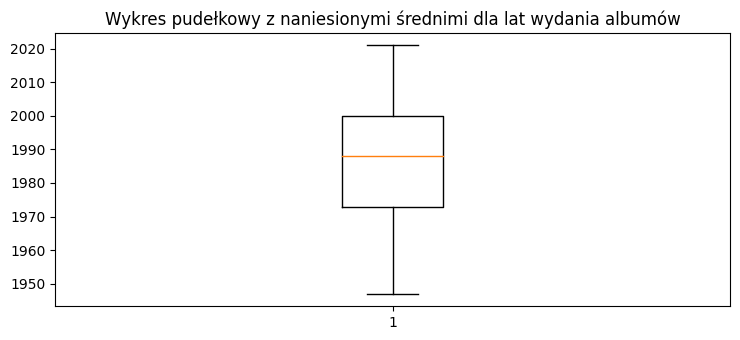

In [51]:
plt.boxplot(years)
plt.title("Wykres pudełkowy z naniesionymi średnimi dla lat wydania albumów")
plt.plot(xs, [a_mean_years]*1000, label="średnia arytmetyczna",c="b")
plt.plot(xs, [h_mean_years]*1000, label="średnia harmoniczna", c="g")
plt.plot(xs, [g_mean_years]*1000, label="średnia geometryczna", c="r")
plt.plot(xs, [t_mean_years]*1000, label="średnia ucinana", c="brown")
plt.plot(xs, [w_mean_years]*1000, label="średnia windsorowska", c="purple")
plt.ylabel("Lata wydania")
plt.legend(loc="best")
plt.show()

**Analiza wykresów pudełkowych oraz średnich**

Celem przeprowadzenia dogłębnej analizy powyższych wykresów, dla każdego zbioru danych wyliczymy następujące wielkości: medianę, kwartyle, rozstępy miedzykwartylowe, wąsy górne i dolne.

**Mediana**

In [1]:
def median(arr):
    n = len(arr)
    arr.sort()
    if n % 2 == 1:
        return arr[n//2]
    else:
        return (arr[int(n/2)-1] + arr[int(n/2)])/2

In [5]:
median_ratings = median(ratings)
median_years = median(years)
print(f"Mediana\n ocen: {median_ratings} \n lat: {median_years}")

Mediana
 ocen: 3.75 
 lat: 1988.0


**Kwartyle**

* Pierwszy kwartyl

In [8]:
def Q1(arr):
    n = len(arr)
    arr.sort()
    less_than = arr[:n // 2]
    return median(less_than)

In [9]:
q1_ratings = Q1(ratings)
q1_years = Q1(years)
print(f"Pierwszy kwartyl\n ocen: {q1_ratings} \n lat: {q1_years}")

Pierwszy kwartyl
 ocen: 3.7 
 lat: 1973.0


* Drugi kwartyl = mediana

* Trzeci kwartyl

In [10]:
def Q3(arr):
    n = len(arr)
    arr.sort()
    greater_than = arr[(n // 2 + n % 2):]
    return median(greater_than)

In [11]:
q3_ratings = Q3(ratings)
q3_years = Q3(years)
print(f"Trzeci kwartyl\n ocen: {q3_ratings} \n lat: {q3_years}")

Trzeci kwartyl
 ocen: 3.81 
 lat: 2000.0


**Rozstęp międzykwartylowy (długość pudełka)**

In [13]:
iqr_ratings = q3_ratings - q1_ratings
iqr_years = q3_years - q1_years
print(f"Rozstęp międzykwartylowy\n ocen: {iqr_ratings} \n lat: {iqr_years}")

Rozstęp międzykwartylowy
 ocen: 0.10999999999999988 
 lat: 27.0


**Wąs dolny $(Q1 - 1.5IQR)$**

In [14]:
lower_bound_ratings = q1_ratings - 1.5 * iqr_ratings
lower_bound_years = q1_years - 1.5 * iqr_years
print(f"Wąs dolny\n ocen: {lower_bound_ratings} \n lat: {lower_bound_years}")

Wąs dolny
 ocen: 3.535 
 lat: 1932.5


**Wąs górny $(Q3 + 1.5IQR)$**

In [15]:
upper_bound_ratings = q3_ratings + 1.5 * iqr_ratings
upper_bound_years = q3_years + 1.5 * iqr_years
print(f"Wąs górny\n ocen: {upper_bound_ratings} \n lat: {upper_bound_years}")

Wąs górny
 ocen: 3.9749999999999996 
 lat: 2040.5


Posiadając już wszystkie wielkości potrzebne do przeanalizowania wykresów pudełkowych, wyciągniemy kilka ważnych wniosków dla każdego z nich

1. Oceny użytkowników
    * Zdecydowana większość ocen znajduje się w przedziale między wąsem górnym i dolnym (od 3.535 do ok. 3.975)
    * Wartości poza tym przedziałem można uznać za odstające - te powyżej wąsa górnego to ścisła czołówka
    * Wszystkie średnie są "powyżej" mediany, co oznacza, że więcej było ocen lepszych (wyższych od środkowej)
    * Wartości odstające wpływają na lekkie odchylenie średnich od mediany
2. Lata wydania albumów
    * Wąsy górny i dolny znajdują się odpowiednio powyżej wartości maksykmalnej i poniżej wartości minimialnej
    * Nie występują wartości odstające
    * Wszystkie średnie są lekko "poniżej" mediany, a więc więcej dobrze ocenianych albumów zostało wydanych przed rokiem 1988 (wartością środkową)
    * Nieznaczne odchylenie średnich od mediany oraz ich niemalże równa wartość (ok. 1987) wskazuje na niemal równomierny rozkład lat wydania albumów


***

**Wariancja**

In [31]:
years_var = np.var(years)
ratings_var = np.var(ratings)
print(f"Wariancja\n ocen: {ratings_var} \n lat: {years_var}")

Wariancja
 ocen: 0.009809419583999994 
 lat: 253.22818524000002


**Odchylenie standardowe**

In [32]:
years_sd = np.sqrt(years_var)
ratings_sd = np.sqrt(ratings_var)
print(f"Odchylenie standardowe \n ocen: {ratings_sd} \n lat: {years_sd}")

Odchylenie standardowe 
 ocen: 0.0990425140230194 
 lat: 15.913145045527614


Na podstawie wyliczonej wariancji oraz odchylenia standardowego możemy stwierdzić, że
* Wsród ocen występuje bardzo małe odchylenie od średniej (dużo ocen jest niemalże równych ich wartości oczekiwanej)
* Lata dość mocno odchylają się od średniej (ponieważ co roku było wydawane mniej więcej tyle samo dobrych albumów)


***

**Porównanie unormalizowanego histogramu z gęstością empiryczną**

* Lata wydania albumów

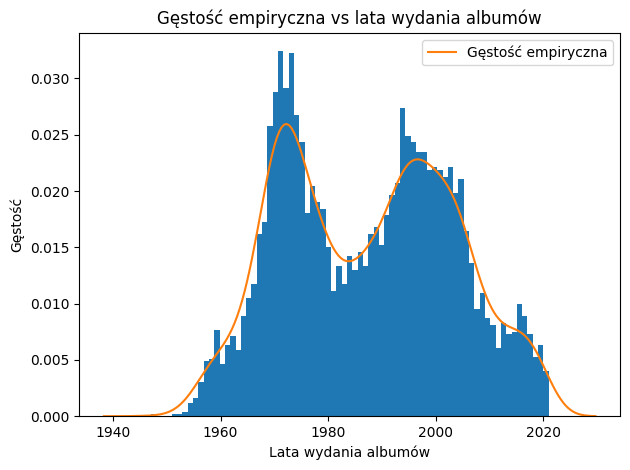

In [4]:
plt.hist(years,density=True,bins = 75)
sns.kdeplot(years, label="Gęstość empiryczna")
plt.xlabel("Lata wydania albumów")
plt.ylabel("Gęstość")
plt.title("Gęstość empiryczna vs lata wydania albumów")
plt.legend(loc="best")
plt.show()

In [109]:
bi = (max(years) - min(years))/(2*iqr_years*5000**(-1/3))
print(bi)
print(max(years), min(years))

23.433003713717696
2021 1947


* Oceny użytkowników

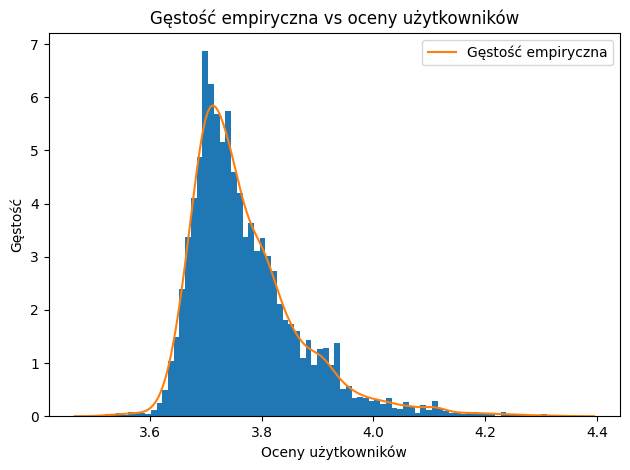

In [5]:
plt.hist(ratings,density=True,bins=80)
sns.kdeplot(ratings, label="Gęstość empiryczna")
plt.xlabel("Oceny użytkowników")
plt.ylabel("Gęstość")
plt.title("Gęstość empiryczna vs oceny użytkowników")
plt.legend(loc="best")
plt.show()

In [110]:
uniques = set(ratings)
print(len(uniques))

77


**Dystrybuanta empiryczna**

* Lata wydania albumów

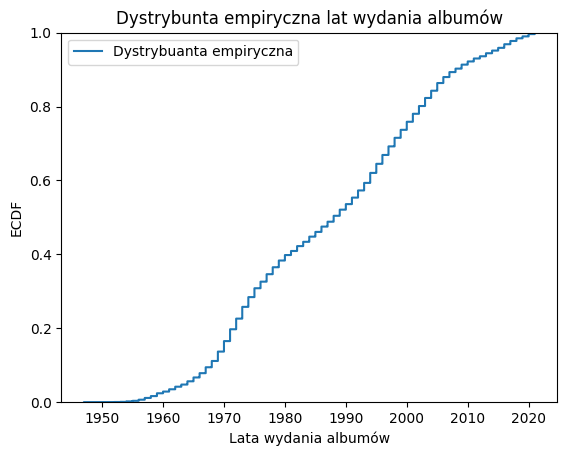

In [20]:
sns.ecdfplot(years, label="Dystrybuanta empiryczna")
plt.xlabel("Lata wydania albumów")
plt.ylabel("ECDF")
plt.title("Dystrybunta empiryczna lat wydania albumów")
plt.legend(loc="best")
plt.show()

* Oceny użytkowników

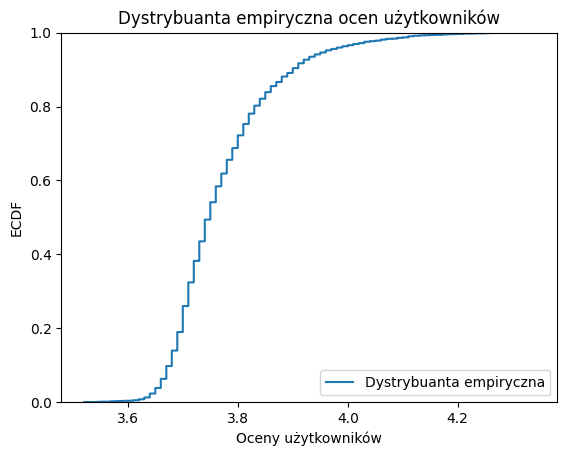

In [21]:
sns.ecdfplot(ratings, label="Dystrybuanta empiryczna")
plt.xlabel("Oceny użytkowników")
plt.ylabel("ECDF")
plt.title("Dystrybuanta empiryczna ocen użytkowników")
plt.legend(loc="best")
plt.show()

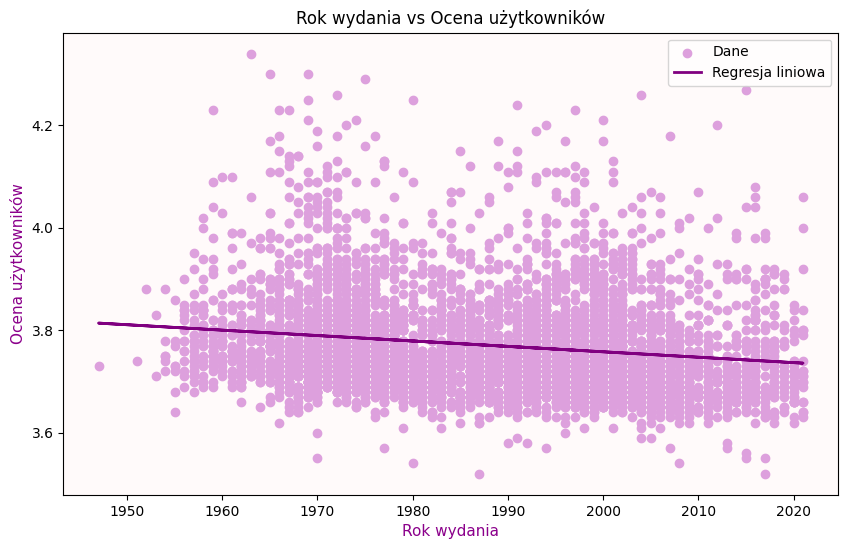

In [28]:
model = LinearRegression() #tworzymy model regresji i później trzeba go dopasować dlatego używam fit()
model.fit(X, Y) #to jest najlepsze dopasowanie prostej do danych 
Y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='plum', label='Dane') 
plt.plot(X, Y_pred, color='purple', linewidth=2, label='Regresja liniowa')  
plt.title('Rok wydania vs Ocena użytkowników')
plt.xlabel('Rok wydania', fontsize=11, color= 'darkmagenta')
plt.ylabel('Ocena użytkowników',fontsize=11,  color= 'darkmagenta')
plt.gca().set_facecolor('snow')
plt.legend()
plt.show()

In [29]:
r_sq = model.score(X, Y)
print(f"Współczynnik determinacji: {r_sq}")

Współczynnik determinacji: 0.028823943933523388


In [30]:
print(f"Wyraz wolny prostej regresji: {model.intercept_}") #b
print(f"Współczynnik kierunkowy prostej regresji: {model.coef_[0]}") #a

Wyraz wolny prostej regresji: 5.87140491944869
Współczynnik kierunkowy prostej regresji: -0.0010566771994452255


In [31]:

corr_result=np.corrcoef(years, Y) 
print(f"Macierz korelacji ocen i lat:\n {corr_result}")

Macierz korelacji ocen i lat:
 [[ 1.         -0.16977616]
 [-0.16977616  1.        ]]
